In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import pyyaml module
import yaml
from yaml.loader import SafeLoader
path_ = "/content/drive/MyDrive/MIE 1666 Project/experiments on new computer/experiment_single"
default_yml_paths = list(Path(path_).rglob("*.yml" ))

path__ = "/content/drive/MyDrive/MIE 1666 Project/experiments on new computer/experiment_grid"
grid_search_yml_paths = list(Path(path__).rglob("*.yml" ))

path___ = "/content/drive/MyDrive/MIE 1666 Project/experiments on new computer/experiment_RL"
rl_yml_paths = list(Path(path___).rglob("*.yml" ))

path____ = "/content/drive/MyDrive/MIE 1666 Project/experiments on new computer/experiment_hetero"
hetero_yml_paths = list(Path(path____).rglob("*.yml" ))

path_____ = "/content/drive/MyDrive/MIE 1666 Project/experiments on new computer/experiment_partition"
partition_yml_paths = list(Path(path_____).rglob("*.yml" ))

path______ = "/content/drive/MyDrive/MIE 1666 Project/experiments on new computer/experiment_random"
random_yml_paths = list(Path(path______).rglob("*.yml" ))

path_______ = "/content/drive/MyDrive/MIE 1666 Project/experiments on new computer/experiment_0.25"
dumb_yml_paths = list(Path(path_______).rglob("*.yml" ))


In [ ]:
print(len(default_yml_paths))
print(len(grid_search_yml_paths))
print(len(rl_yml_paths))
print(len(hetero_yml_paths))
print(len(partition_yml_paths))
print(len(random_yml_paths))
print(len(dumb_yml_paths))

360
363
363
360
360
363
363


In [ ]:
rows = {}
unique_grid_names = []
for yml in default_yml_paths:
   #print(yml)
   name = str(yml).split("experiment_single/")[1].split("__trans")[0]
   seed = int(str(yml).split("seed__")[1].split("__")[0]) - 1
   unique_grid_names.append(name)
   if "root" in str(yml):
     with open(str(yml)) as f:
                data = yaml.load(f, Loader=SafeLoader)
                
     if name in rows:
      rows[name][seed] = [data['gap'],data['solve_time'],data['status']]
     if name not in rows:
      rows[name] = [[],[],[]]    
      rows[name][seed] = [data['gap'],data['solve_time'],data['status']]

     print(name, data['gap'])

names,avg_gaps,avg_times,statuses= [],[],[],[]
for key, value in rows.items():
  #if key != "neos-4724674-aorere":
    avg_gap = np.mean([value[0][0],value[1][0],value[2][0]])
    avg_time = np.mean([value[0][1],value[1][1],value[2][1]])
    names.append(key)
    avg_gaps.append(avg_gap)
    avg_times.append(avg_time)
    statuses.append(value[0][-1])

df_grid_search = pd.DataFrame([names,avg_gaps,avg_times,statuses]).transpose()
df_grid_search.columns = ['NAME','gap','SOLUTION TIME', 'status']
df_grid_search.head(5)
df_grid_search.to_csv("/content/drive/MyDrive/MIE 1666 Project/FINAL_RESULTS/single.csv")

graphdraw-domain 0.5262458316119732
bienst1 0.7523360402188736
bienst1 0.8641144148790364
bienst1 0.9282745943528
milo-v13-4-3d-4-0 4.303044918514184
milo-v13-4-3d-4-0 4.0346750282286425
milo-v13-4-3d-4-0 4.161050585916378
mkc1 0.005254535103534154
mkc1 0.003701626501829207
mkc1 0.00454608257746909
physiciansched5-3 2.017832647462277
physiciansched5-3 2.3515522518583283
physiciansched5-3 2.1344307270233185
mkc 0.0
mkc 0.0
mkc 0.0
f2gap801600 0.0008400504395817203
f2gap801600 0.0008400504395817203
f2gap801600 0.0008400504395817203
mik-250-20-75-5 0.01925276913178418
mik-250-20-75-5 0.019252769131784902
mik-250-20-75-5 0.01925276913178418
cost266-UUE 0.18379995239683092
cost266-UUE 0.18866251729666897
cost266-UUE 0.18890309693076163
neos-631517 0.39679820492429557
neos-631517 0.4122395541234084
neos-631517 0.3997432851761811
mtest4ma 0.009101555032953988
mtest4ma 0.0071968372344869205
mtest4ma 0.00673382679584762
tanglegram6 18.65771643663739
tanglegram6 20.499222395023327
tanglegram6 19

# Averaging over all grid search seeds

In [ ]:

df_default.to_csv("/content/drive/MyDrive/MIE 1666 Project/init_submission_results/df_default.csv")
df_rl.to_csv("/content/drive/MyDrive/MIE 1666 Project/init_submission_results/df_rl.csv")
df_grid_search.to_csv("/content/drive/MyDrive/MIE 1666 Project/init_submission_results/df_grid.csv")
df_hit_time_limit.to_csv("/content/drive/MyDrive/MIE 1666 Project/init_submission_results/df_node_limit.csv")

In [ ]:
df_optimal.to_csv("/content/drive/MyDrive/MIE 1666 Project/init_submission_results/df_optimal.csv")

In [ ]:
rows = {}
unique_grid_names = []
for yml in grid_search_yml_paths:
   print(yml)
   name = str(yml).split("experiment_grid/")[1].split("__trans")[0]
   seed = int(str(yml).split("seed__")[1].split("__")[0]) - 1
   unique_grid_names.append(name)
   if "root" in str(yml):
     with open(str(yml)) as f:
                data = yaml.load(f, Loader=SafeLoader)
                
     if name in rows:
      rows[name][seed] = [data['gap'],data['solve_time'],data['status']]
     if name not in rows:
      rows[name] = [[],[],[]]    
      rows[name][seed] = [data['gap'],data['solve_time'],data['status']]

     print(name, data['gap'])

names,avg_gaps,avg_times,statuses= [],[],[],[]
for key, value in rows.items():
  avg_gap = np.mean([value[0][0],value[1][0],value[2][0]])
  avg_time = np.mean([value[0][1],value[1][1],value[2][1]])
  names.append(key)
  avg_gaps.append(avg_gap)
  avg_times.append(avg_time)
  statuses.append(value[0][-1])

df_grid_search = pd.DataFrame([names,avg_gaps,avg_times,statuses]).transpose()
df_grid_search.columns = ['NAME','gap','SOLUTION TIME', 'status']
df_grid_search.head(5)

/content/drive/MyDrive/MIE 1666 Project/experiments_new_full_3_seed/experiment_grid/berlin__trans__root__seed__3__sample__0.yml
berlin 0.0
/content/drive/MyDrive/MIE 1666 Project/experiments_new_full_3_seed/experiment_grid/berlin__trans__root__seed__2__sample__0.yml
berlin 0.0
/content/drive/MyDrive/MIE 1666 Project/experiments_new_full_3_seed/experiment_grid/bg512142__trans__root__seed__1__sample__0.yml
bg512142 0.3430349942938748
/content/drive/MyDrive/MIE 1666 Project/experiments_new_full_3_seed/experiment_grid/bg512142__trans__root__seed__2__sample__0.yml
bg512142 0.31414531442411525
/content/drive/MyDrive/MIE 1666 Project/experiments_new_full_3_seed/experiment_grid/bg512142__trans__root__seed__3__sample__0.yml
bg512142 0.31789432079210694
/content/drive/MyDrive/MIE 1666 Project/experiments_new_full_3_seed/experiment_grid/bienst1__trans__root__seed__1__sample__0.yml
bienst1 0.9382020780200581
/content/drive/MyDrive/MIE 1666 Project/experiments_new_full_3_seed/experiment_grid/bienst

,NAME,gap,SOLUTION TIME,status
0,berlin,0.0,0.790234,optimal
1,bg512142,0.325025,2.619662,nodelimit
2,bienst1,0.813869,2.062659,nodelimit
3,bienst2,1.216365,2.359396,nodelimit
4,binkar10_1,0.004311,2.533756,nodelimit


#Average over Rl

In [ ]:
rows = {}
unique_grid_names = []
for yml in rl_yml_paths:
   print(yml)
   name = str(yml).split("experiment_RL/")[1].split("__trans")[0]
   seed = int(str(yml).split("seed__")[1].split("__")[0]) - 1
   unique_grid_names.append(name)
   if "root" in str(yml):
     with open(str(yml)) as f:
                data = yaml.load(f, Loader=SafeLoader)
                
     if name in rows:
      rows[name][seed] = [data['gap'],data['solve_time'],data['status']]
     if name not in rows:
      rows[name] = [[],[],[]]    
      rows[name][seed] = [data['gap'],data['solve_time'],data['status']]

     print(name, data['gap'])

names,avg_gaps,avg_times,statuses= [],[],[],[]
for key, value in rows.items():
  try:

    avg_gap = np.mean([value[0][0],value[1][0],value[2][0]])
    avg_time = np.mean([value[0][1],value[1][1],value[2][1]])
    names.append(key)
    avg_gaps.append(avg_gap)
    avg_times.append(avg_time)
    statuses.append(value[0][-1])
  except:
    pass

df_rl = pd.DataFrame([names,avg_gaps,avg_times,statuses]).transpose()
df_rl.columns = ['NAME','gap','SOLUTION TIME', 'status']
df_rl.head(5)

/content/drive/MyDrive/MIE 1666 Project/experiments_new_full_3_seed/experiment_RL/b2c1s1__trans__root__seed__3__sample__0.yml
b2c1s1 0.904234278860103
/content/drive/MyDrive/MIE 1666 Project/experiments_new_full_3_seed/experiment_RL/berlin__trans__root__seed__2__sample__0.yml
berlin 0.0
/content/drive/MyDrive/MIE 1666 Project/experiments_new_full_3_seed/experiment_RL/berlin__trans__root__seed__1__sample__0.yml
berlin 0.0
/content/drive/MyDrive/MIE 1666 Project/experiments_new_full_3_seed/experiment_RL/berlin__trans__root__seed__3__sample__0.yml
berlin 0.0
/content/drive/MyDrive/MIE 1666 Project/experiments_new_full_3_seed/experiment_RL/bg512142__trans__root__seed__1__sample__0.yml
bg512142 0.34376397410390963
/content/drive/MyDrive/MIE 1666 Project/experiments_new_full_3_seed/experiment_RL/bg512142__trans__root__seed__2__sample__0.yml
bg512142 0.3219017444480638
/content/drive/MyDrive/MIE 1666 Project/experiments_new_full_3_seed/experiment_RL/bg512142__trans__root__seed__3__sample__0.y

,NAME,gap,SOLUTION TIME,status
0,b2c1s1,0.873663,1.588518,nodelimit
1,berlin,0.0,0.746871,optimal
2,bg512142,0.329165,2.680081,nodelimit
3,bienst1,0.875467,2.135686,nodelimit
4,bienst2,1.291415,2.597132,nodelimit


# Averaging over default seeds


In [ ]:
rows = {}
for yml in default_yml_paths:
   name = str(yml).split("experiment_default/")[1].split("__trans")[0]
   seed = int(str(yml).split("seed__")[1].split("__")[0]) - 1
   
   if "root" in str(yml):
     #print(yml)
     with open(str(yml)) as f:
                data = yaml.load(f, Loader=SafeLoader)
     if name in rows:
      rows[name][seed] = [data['gap'],data['solve_time'],data['status']]
     if name not in rows:
      rows[name] = [[],[],[]]    
      rows[name][seed] = [data['gap'],data['solve_time'],data['status']]
     print(name, data['gap'])
names,avg_gaps,avg_times,statuses= [],[],[],[]
for key, value in rows.items():
  avg_gap = np.mean([value[0][0],value[1][0],value[2][0]])
  avg_time = np.mean([value[0][1],value[1][1],value[2][1]])
  names.append(key)
  avg_gaps.append(avg_gap)
  avg_times.append(avg_time)
  statuses.append(value[0][-1])

df_default = pd.DataFrame([names,avg_gaps,avg_times,statuses]).transpose()
df_default.columns = ['NAME','gap','SOLUTION TIME', 'status']
df_default.head()

# Plot

In [ ]:
df_merge2 = pd.merge(df_default, df_grid_search, on='NAME', how='inner', suffixes=('', '_grid'))
df_merge3 = pd.merge(df_merge2, df_rl, on='NAME', how='inner', suffixes=('', '_rl'))
df_merge3.shape

(75, 10)

In [ ]:
df_merge2.tofloat

NAME                  object
gap                   object
SOLUTION TIME         object
status                object
gap_grid              object
SOLUTION TIME_grid    object
status_grid           object
dtype: object

In [ ]:
df_merge3.to_csv("/content/drive/MyDrive/MIE 1666 Project/init_submission_results/all_merged.csv")

In [ ]:

df_merge2 = pd.merge(df_default, df_grid_search, on='NAME', how='inner', suffixes=('', '_grid'))
df_merge3 = pd.merge(df_merge2, df_rl, on='NAME', how='inner', suffixes=('', '_rl'))
#df_merge3.tofloat
df_hit_time_limit = df_merge3[df_merge3['status'] == 'nodelimit']

df_optimal = df_merge3[df_merge3['status'] != 'nodelimit']


In [ ]:
df_hit_time_limit.shape

(66, 10)

In [ ]:
#df_merge2 = df_hit_time_limit
df_hit_time_limit.head(30)

,NAME,gap,SOLUTION TIME,status,gap_grid,SOLUTION TIME_grid,status_grid,gap_rl,SOLUTION TIME_rl,status_rl
0,22433,0.003552,4.286276,nodelimit,0.004734,3.644553,nodelimit,0.004165,2.725756,nodelimit
1,23588,0.040248,3.064685,nodelimit,0.040355,3.071196,nodelimit,0.040168,2.995241,nodelimit
2,50v-10,0.040466,1.52724,nodelimit,0.03837,1.430069,nodelimit,0.038852,1.47065,nodelimit
3,a2c1s1,0.777642,1.204033,nodelimit,0.633244,0.978514,nodelimit,0.649581,0.871951,nodelimit
4,app1-1,1.333333,2.564902,nodelimit,1.333333,2.72356,nodelimit,1.333333,2.927861,nodelimit
5,app3,0.011496,1.573995,nodelimit,0.009918,1.296219,nodelimit,0.010439,1.261077,nodelimit
6,b1c1s1,0.884631,1.557464,nodelimit,0.779576,1.404955,nodelimit,0.790957,1.180363,nodelimit
7,b2c1s1,0.95681,1.724073,nodelimit,0.892882,1.711784,nodelimit,0.873663,1.871401,nodelimit
11,bg512142,0.327021,3.045619,nodelimit,0.325025,2.617052,nodelimit,0.329165,2.948349,nodelimit
12,bienst1,0.851624,1.943811,nodelimit,0.813869,2.227402,nodelimit,0.875467,2.155323,nodelimit


In [ ]:
df_optimal.head(30)

,NAME,gap,SOLUTION TIME,status,gap_grid,SOLUTION TIME_grid,status_grid,gap_rl,SOLUTION TIME_rl,status_rl
0,berlin,0.0,0.587572,optimal,0.0,0.790234,optimal,0.0,0.746871,optimal
7,brasil,0.0,0.778184,optimal,0.0,0.848398,optimal,0.0,0.772025,optimal
40,mkc,0.0,2.046985,optimal,0.0,3.555713,optimal,0.0,1.684842,optimal
43,n2seq36q,0.003846,20.209884,timelimit,0.003846,22.44521,timelimit,0.003846,20.193021,timelimit
45,n3707,0.313789,20.008745,timelimit,0.313758,19.915998,nodelimit,0.317862,19.799611,timelimit
53,neos-2978205-isar,0.041045,21.099867,timelimit,0.041045,20.637024,timelimit,0.041045,20.569419,timelimit
57,neos-3581454-haast,0.0,11.516829,optimal,0.0,10.028413,optimal,0.0,8.018733,optimal
69,neos-5102383-irwell,0.271648,21.427967,timelimit,0.26971,21.767867,timelimit,0.271648,22.239627,timelimit
74,neos-691058,0.259162,20.000282,timelimit,0.245031,20.000347,timelimit,0.214154,20.000302,timelimit
75,neos-860300,0.0,3.907328,optimal,0.0,3.223924,optimal,0.0,3.561391,optimal


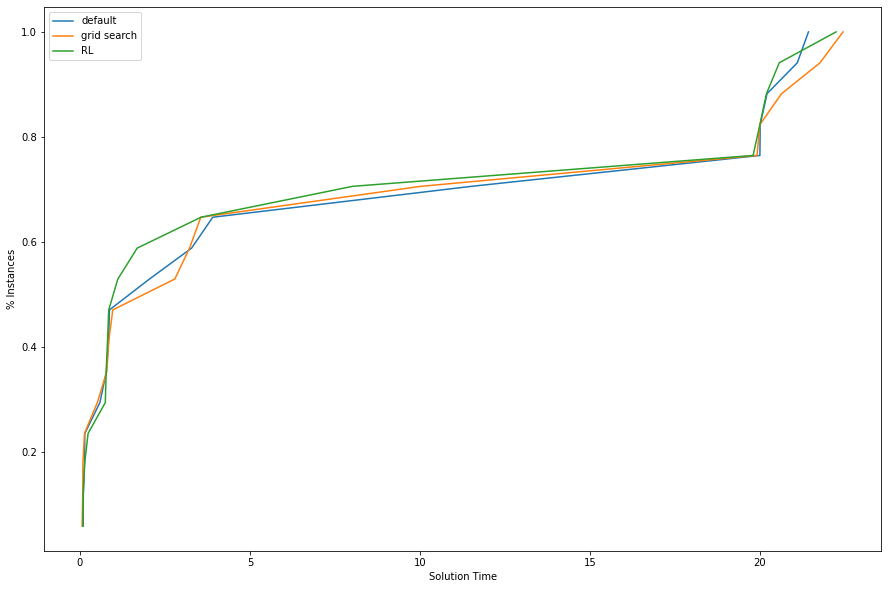

In [ ]:
stats_df = df_optimal.groupby('SOLUTION TIME')['SOLUTION TIME'].agg('count').pipe(pd.DataFrame).rename(columns = {'SOLUTION TIME': 'frequency_default'})
stats_df2 = df_optimal.groupby('SOLUTION TIME_grid')['SOLUTION TIME_grid'].agg('count').pipe(pd.DataFrame).rename(columns = {'SOLUTION TIME_grid': 'frequency_grid'})
stats_df3 = df_optimal.groupby('SOLUTION TIME_rl')['SOLUTION TIME_rl'].agg('count').pipe(pd.DataFrame).rename(columns = {'SOLUTION TIME_rl': 'frequency_rl'})


stats_df['pdf_default'] = stats_df['frequency_default'] / sum(stats_df['frequency_default'])
stats_df2['pdf_grid'] = stats_df2['frequency_grid'] / sum(stats_df2['frequency_grid'])
stats_df3['pdf_rl'] = stats_df3['frequency_rl'] / sum(stats_df3['frequency_rl'])

stats_df['cdf_default'] = stats_df['pdf_default'].cumsum()
stats_df = stats_df.reset_index()
stats_df2['cdf_grid'] = stats_df2['pdf_grid'].cumsum()
stats_df2 = stats_df2.reset_index()
stats_df3['cdf_rl'] = stats_df3['pdf_rl'].cumsum()
stats_df3 = stats_df3.reset_index()

plt.figure(figsize= (15,10))
plt.plot(stats_df['SOLUTION TIME'].to_list(), stats_df['cdf_default'].to_list(), label = "default")
plt.plot(stats_df2['SOLUTION TIME_grid'].to_list(), stats_df2['cdf_grid'].to_list(), label = "grid search")
plt.plot(stats_df3['SOLUTION TIME_rl'].to_list(), stats_df3['cdf_rl'].to_list(), label = "RL")
plt.xlabel('Solution Time')
plt.ylabel('% Instances')
plt.legend()
plt.show()

In [ ]:
df_hit_time_limit.shape

(103, 10)

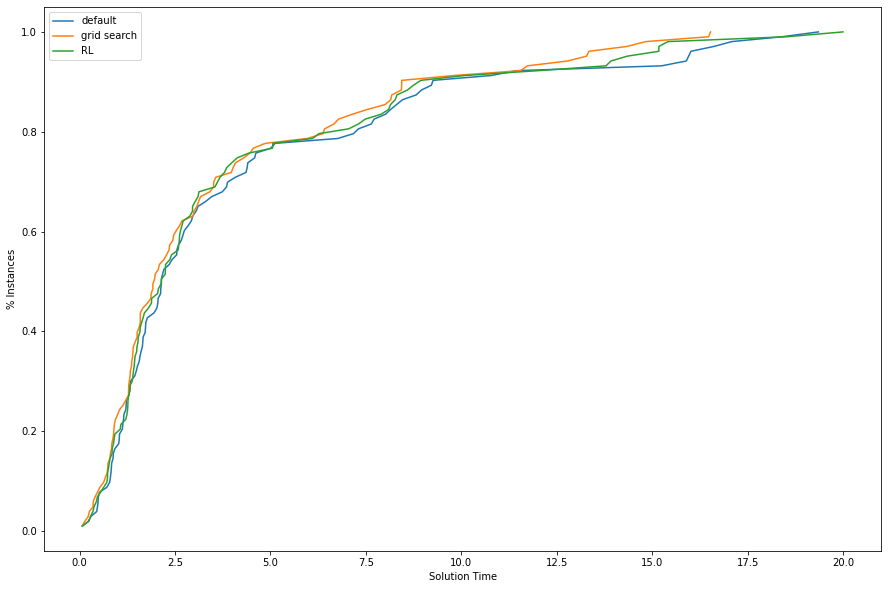

In [ ]:
stats_df = df_hit_time_limit.groupby('SOLUTION TIME')['SOLUTION TIME'].agg('count').pipe(pd.DataFrame).rename(columns = {'SOLUTION TIME': 'frequency_default'})
stats_df2 = df_hit_time_limit.groupby('SOLUTION TIME_grid')['SOLUTION TIME_grid'].agg('count').pipe(pd.DataFrame).rename(columns = {'SOLUTION TIME_grid': 'frequency_grid'})
stats_df3 = df_hit_time_limit.groupby('SOLUTION TIME_rl')['SOLUTION TIME_rl'].agg('count').pipe(pd.DataFrame).rename(columns = {'SOLUTION TIME_rl': 'frequency_rl'})


stats_df['pdf_default'] = stats_df['frequency_default'] / sum(stats_df['frequency_default'])
stats_df2['pdf_grid'] = stats_df2['frequency_grid'] / sum(stats_df2['frequency_grid'])
stats_df3['pdf_rl'] = stats_df3['frequency_rl'] / sum(stats_df3['frequency_rl'])

stats_df['cdf_default'] = stats_df['pdf_default'].cumsum()
stats_df = stats_df.reset_index()
stats_df2['cdf_grid'] = stats_df2['pdf_grid'].cumsum()
stats_df2 = stats_df2.reset_index()
stats_df3['cdf_rl'] = stats_df3['pdf_rl'].cumsum()
stats_df3 = stats_df3.reset_index()

plt.figure(figsize= (15,10))
plt.plot(stats_df['SOLUTION TIME'].to_list(), stats_df['cdf_default'].to_list(), label = "default")
plt.plot(stats_df2['SOLUTION TIME_grid'].to_list(), stats_df2['cdf_grid'].to_list(), label = "grid search")
plt.plot(stats_df3['SOLUTION TIME_rl'].to_list(), stats_df3['cdf_rl'].to_list(), label = "RL")
plt.xlabel('Solution Time')
plt.ylabel('% Instances')
plt.legend()
plt.show()

In [ ]:
default = pd.read_csv("/content/drive/MyDrive/MIE 1666 Project/FINAL_RESULTS/default.csv")
gs = pd.read_csv("/content/drive/MyDrive/MIE 1666 Project/FINAL_RESULTS/grid_search.csv")
rl = pd.read_csv("/content/drive/MyDrive/MIE 1666 Project/FINAL_RESULTS/rl.csv")
rndm = pd.read_csv("/content/drive/MyDrive/MIE 1666 Project/FINAL_RESULTS/random.csv")
partition = pd.read_csv("/content/drive/MyDrive/MIE 1666 Project/FINAL_RESULTS/partition.csv")
hetero = pd.read_csv("/content/drive/MyDrive/MIE 1666 Project/FINAL_RESULTS/hetero.csv")
dumb = pd.read_csv("/content/drive/MyDrive/MIE 1666 Project/FINAL_RESULTS/dumb.csv")


df = pd.merge(default, gs, on='NAME', how='inner', suffixes=('', '_grid'))
df = pd.merge(df, rl, on='NAME', how='inner', suffixes=('', '_rl'))
df = pd.merge(df, rndm, on='NAME', how='inner', suffixes=('', '_rndm'))
df = pd.merge(df, partition, on='NAME', how='inner', suffixes=('', '_partition'))
df = pd.merge(df, hetero, on='NAME', how='inner', suffixes=('', '_hetero'))
df = pd.merge(df, dumb, on='NAME', how='inner', suffixes=('', '_dumb'))
df.to_csv("/content/drive/MyDrive/MIE 1666 Project/FINAL_RESULTS/all_merged.csv")

In [ ]:
df_merged = pd.read_csv("/content/drive/MyDrive/MIE 1666 Project/init_submission_results/all_merged.csv")
df_hetero = pd.read_csv("/content/drive/MyDrive/MIE 1666 Project/init_submission_results/hetero_dec8.csv")
df_partition = pd.read_csv("/content/drive/MyDrive/MIE 1666 Project/init_submission_results/partition_dec8.csv")

In [ ]:
df_merge2 = pd.merge(df_merged, df_hetero, on='NAME', how='inner', suffixes=('', '_hetero'))
df_merge3 = pd.merge(df_merge2, df_partition, on='NAME', how='inner', suffixes=('', '_partition'))
#df_merge3.tofloat
df_hit_time_limit = df_merge3[df_merge3['status'] == 'nodelimit']

df_optimal = df_merge3[df_merge3['status'] != 'nodelimit']

In [ ]:

df = pd.read_csv("/content/drive/MyDrive/MIE 1666 Project/FINAL_RESULTS/all_merged.csv")


df_hit_time_limit = df[df['status'] == 'nodelimit']

df_optimal = df[df['status'] != 'nodelimit']
print(df_hit_time_limit.shape)
print(df_optimal.shape)

(103, 30)
(17, 30)


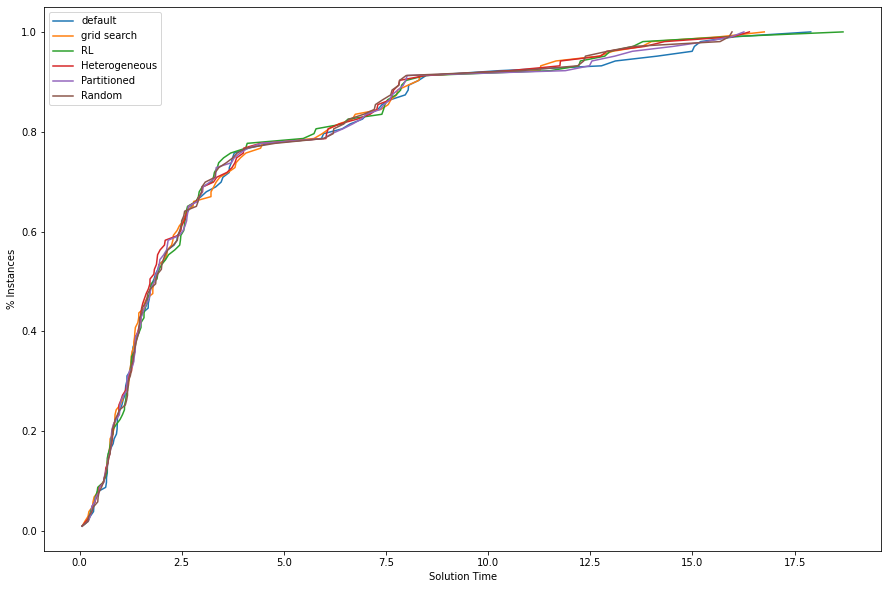

In [ ]:
stats_df = df_hit_time_limit.groupby('SOLUTION TIME')['SOLUTION TIME'].agg('count').pipe(pd.DataFrame).rename(columns = {'SOLUTION TIME': 'frequency_default'})
stats_df2 = df_hit_time_limit.groupby('SOLUTION TIME_grid')['SOLUTION TIME_grid'].agg('count').pipe(pd.DataFrame).rename(columns = {'SOLUTION TIME_grid': 'frequency_grid'})
stats_df3 = df_hit_time_limit.groupby('SOLUTION TIME_rl')['SOLUTION TIME_rl'].agg('count').pipe(pd.DataFrame).rename(columns = {'SOLUTION TIME_rl': 'frequency_rl'})
stats_df4 = df_hit_time_limit.groupby('SOLUTION TIME_hetero')['SOLUTION TIME_hetero'].agg('count').pipe(pd.DataFrame).rename(columns = {'SOLUTION TIME_hetero': 'frequency_hetero'})
stats_df5 = df_hit_time_limit.groupby('SOLUTION TIME_partition')['SOLUTION TIME_partition'].agg('count').pipe(pd.DataFrame).rename(columns = {'SOLUTION TIME_partition': 'frequency_partition'})
stats_df6 = df_hit_time_limit.groupby('SOLUTION TIME_rndm')['SOLUTION TIME_rndm'].agg('count').pipe(pd.DataFrame).rename(columns = {'SOLUTION TIME_rndm': 'frequency_rndm'})
stats_df7 = df_hit_time_limit.groupby('SOLUTION TIME_dumb')['SOLUTION TIME_dumb'].agg('count').pipe(pd.DataFrame).rename(columns = {'SOLUTION TIME_dumb': 'frequency_dumb'})

stats_df['pdf_default'] = stats_df['frequency_default'] / sum(stats_df['frequency_default'])
stats_df2['pdf_grid'] = stats_df2['frequency_grid'] / sum(stats_df2['frequency_grid'])
stats_df3['pdf_rl'] = stats_df3['frequency_rl'] / sum(stats_df3['frequency_rl'])
stats_df4['pdf_hetero'] = stats_df4['frequency_hetero'] / sum(stats_df4['frequency_hetero'])
stats_df5['pdf_partition'] = stats_df5['frequency_partition'] / sum(stats_df5['frequency_partition'])
stats_df6['pdf_rndm'] = stats_df6['frequency_rndm'] / sum(stats_df6['frequency_rndm'])

stats_df7['pdf_dumb'] = stats_df7['frequency_dumb'] / sum(stats_df7['frequency_dumb'])
stats_df['cdf_default'] = stats_df['pdf_default'].cumsum()
stats_df = stats_df.reset_index()
stats_df2['cdf_grid'] = stats_df2['pdf_grid'].cumsum()
stats_df2 = stats_df2.reset_index()
stats_df3['cdf_rl'] = stats_df3['pdf_rl'].cumsum()
stats_df3 = stats_df3.reset_index()
stats_df4['cdf_hetero'] = stats_df4['pdf_hetero'].cumsum()
stats_df4 = stats_df4.reset_index()

stats_df5['cdf_partition'] = stats_df5['pdf_partition'].cumsum()
stats_df5 = stats_df5.reset_index()
stats_df6['cdf_rndm'] = stats_df6['pdf_rndm'].cumsum()
stats_df6 = stats_df6.reset_index()

stats_df7['cdf_dumb'] = stats_df7['pdf_dumb'].cumsum()
stats_df7 = stats_df7.reset_index()


plt.figure(figsize= (15,10))
plt.plot(stats_df['SOLUTION TIME'].to_list(), stats_df['cdf_default'].to_list(), label = "default")
plt.plot(stats_df2['SOLUTION TIME_grid'].to_list(), stats_df2['cdf_grid'].to_list(), label = "grid search")
plt.plot(stats_df3['SOLUTION TIME_rl'].to_list(), stats_df3['cdf_rl'].to_list(), label = "RL")
plt.plot(stats_df4['SOLUTION TIME_hetero'].to_list(), stats_df4['cdf_hetero'].to_list(), label = "Heterogeneous")
plt.plot(stats_df5['SOLUTION TIME_partition'].to_list(), stats_df5['cdf_partition'].to_list(), label = "Partitioned")
plt.plot(stats_df6['SOLUTION TIME_rndm'].to_list(), stats_df6['cdf_rndm'].to_list(), label = "Random")
plt.xlabel('Solution Time')
plt.ylabel('% Instances')
plt.legend()
plt.show()

# Relative Gap Improvement


In [13]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("/content/drive/MyDrive/MIE 1666 Project/FINAL_RESULTS/all_merged.csv")
df_ = pd.read_csv("/content/drive/MyDrive/MIE 1666 Project/FINAL_RESULTS/single.csv")

df = pd.merge(df, df_, on='NAME', how='inner', suffixes=('', '_single'))

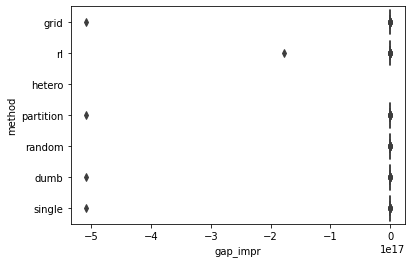

In [14]:
from pandas.io.formats.format import GenericArrayFormatter
df['gap_impr_grid'] = -1* (df['gap_grid'] - df['gap'] )/(df['gap']+1e-8)
df['gap_impr_rl'] = -1* (df['gap_rl'] - df['gap'] )/(df['gap']+1e-8)
df['gap_impr_hetero'] = -1* (df['gap_hetero'] - df['gap'] )/(df['gap']+1e-8)
df['gap_impr_partition'] = -1* (df['gap_partition'] - df['gap'] )/(df['gap']+1e-8)
df['gap_impr_rndm'] = -1* (df['gap_rndm'] - df['gap'] )/(df['gap']+1e-8)
df['gap_impr_dumb'] = -1* (df['gap_dumb'] - df['gap'] )/(df['gap']+1e-8)
df['gap_impr_dumb'] = -1* (df['gap_dumb'] - df['gap'] )/(df['gap']+1e-8)
df['gap_impr_single'] = -1* (df['gap_single'] - df['gap'] )/(df['gap']+1e-8)


grid = df[['NAME','gap_grid','gap_impr_grid','status_grid']].copy()
grid.columns = ['NAME','gap','gap_impr','status',]
grid['method'] = 'grid'

rl = df[['NAME','gap_rl','gap_impr_rl','status_rl']].copy()
rl.columns = ['NAME','gap','gap_impr','status']
rl['method'] = 'rl'

hetero = df[['NAME','gap_hetero','gap_impr_hetero','status_hetero']].copy()
hetero.columns = ['NAME','gap','gap_hetero','status']
hetero['method'] = 'hetero'


partition = df[['NAME','gap_partition','gap_impr_partition','status_partition']].copy()
partition.columns = ['NAME','gap','gap_impr','status']
partition['method'] = 'partition'

rndm = df[['NAME','gap_rndm','gap_impr_rndm','status_rndm']].copy()
rndm.columns = ['NAME','gap','gap_impr','status']
rndm['method'] = 'random'

dumb = df[['NAME','gap_dumb','gap_impr_dumb','status_dumb']].copy()
dumb.columns = ['NAME','gap','gap_impr','status']
dumb['method'] = 'dumb'

signle = df[['NAME','gap_single','gap_impr_single','status_single']].copy()
signle.columns = ['NAME','gap','gap_impr','status']
signle['method'] = 'single'

gap_impr = pd.concat([grid,rl,hetero,partition,rndm,dumb,signle])
gap_impr = gap_impr.reset_index()

gap_impr = gap_impr[gap_impr['status'] != 'optimal']
sns.boxplot(data=gap_impr, x="gap_impr", y="method")

In [15]:
df_not_optimal = df[df['status'] != 'optimal']

In [16]:

df_not_optimal = df_not_optimal.loc[df_not_optimal['gap_impr_grid']>-1]
df_not_optimal = df_not_optimal.loc[df_not_optimal['gap_impr_rl']>-1]
df_not_optimal = df_not_optimal.loc[df_not_optimal['gap_impr_hetero']>-1]
df_not_optimal = df_not_optimal.loc[df_not_optimal['gap_impr_partition']>-1]
df_not_optimal = df_not_optimal.loc[df_not_optimal['gap_impr_rndm']>-1]
df_not_optimal = df_not_optimal.loc[df_not_optimal['gap_impr_dumb']>-1]

In [17]:
df_not_optimal.head()

,Unnamed: 0,Unnamed: 0.1,NAME,gap,SOLUTION TIME,status,Unnamed: 0_grid,gap_grid,SOLUTION TIME_grid,status_grid,...,gap_single,SOLUTION TIME_single,status_single,gap_impr_grid,gap_impr_rl,gap_impr_hetero,gap_impr_partition,gap_impr_rndm,gap_impr_dumb,gap_impr_single
0,0,0,milo-v13-4-3d-4-0,4.277808,1.461589,nodelimit,0,4.516452,1.583380,nodelimit,...,4.166257,1.498527,nodelimit,-0.055787,0.028701,0.012713,0.012713,0.007969,-0.006646,0.026077
1,1,1,mkc1,0.004677,3.712706,nodelimit,1,0.005198,3.216051,nodelimit,...,0.004501,3.016593,nodelimit,-0.111485,0.184370,-0.036609,0.112888,0.073745,-0.051459,0.037597
2,2,2,physiciansched5-3,2.128119,7.402270,nodelimit,2,2.172223,7.371810,nodelimit,...,2.167939,7.312195,nodelimit,-0.020724,-0.044038,-0.044143,-0.019401,-0.020075,-0.020050,-0.018711
4,4,4,f2gap801600,0.000877,0.989632,nodelimit,4,0.001106,0.840837,nodelimit,...,0.000840,1.007295,nodelimit,-0.260769,-0.263135,-0.256539,-0.256539,-0.239860,-0.260769,0.042059
5,5,5,mik-250-20-75-5,0.017295,1.063944,nodelimit,5,0.019194,1.284462,nodelimit,...,0.019253,1.693089,nodelimit,-0.109775,-0.133642,-0.113195,-0.113195,-0.089344,-0.105894,-0.113195


In [18]:
df_not_optimal.loc[df_not_optimal['NAME'] == "h50x2450"]

,Unnamed: 0,Unnamed: 0.1,NAME,gap,SOLUTION TIME,status,Unnamed: 0_grid,gap_grid,SOLUTION TIME_grid,status_grid,...,gap_single,SOLUTION TIME_single,status_single,gap_impr_grid,gap_impr_rl,gap_impr_hetero,gap_impr_partition,gap_impr_rndm,gap_impr_dumb,gap_impr_single
40,40,40,h50x2450,0.394347,2.473732,nodelimit,40,0.332033,2.607003,nodelimit,...,0.350405,2.511464,nodelimit,0.158017,0.079485,0.084776,0.084776,0.082976,0.101773,0.111429


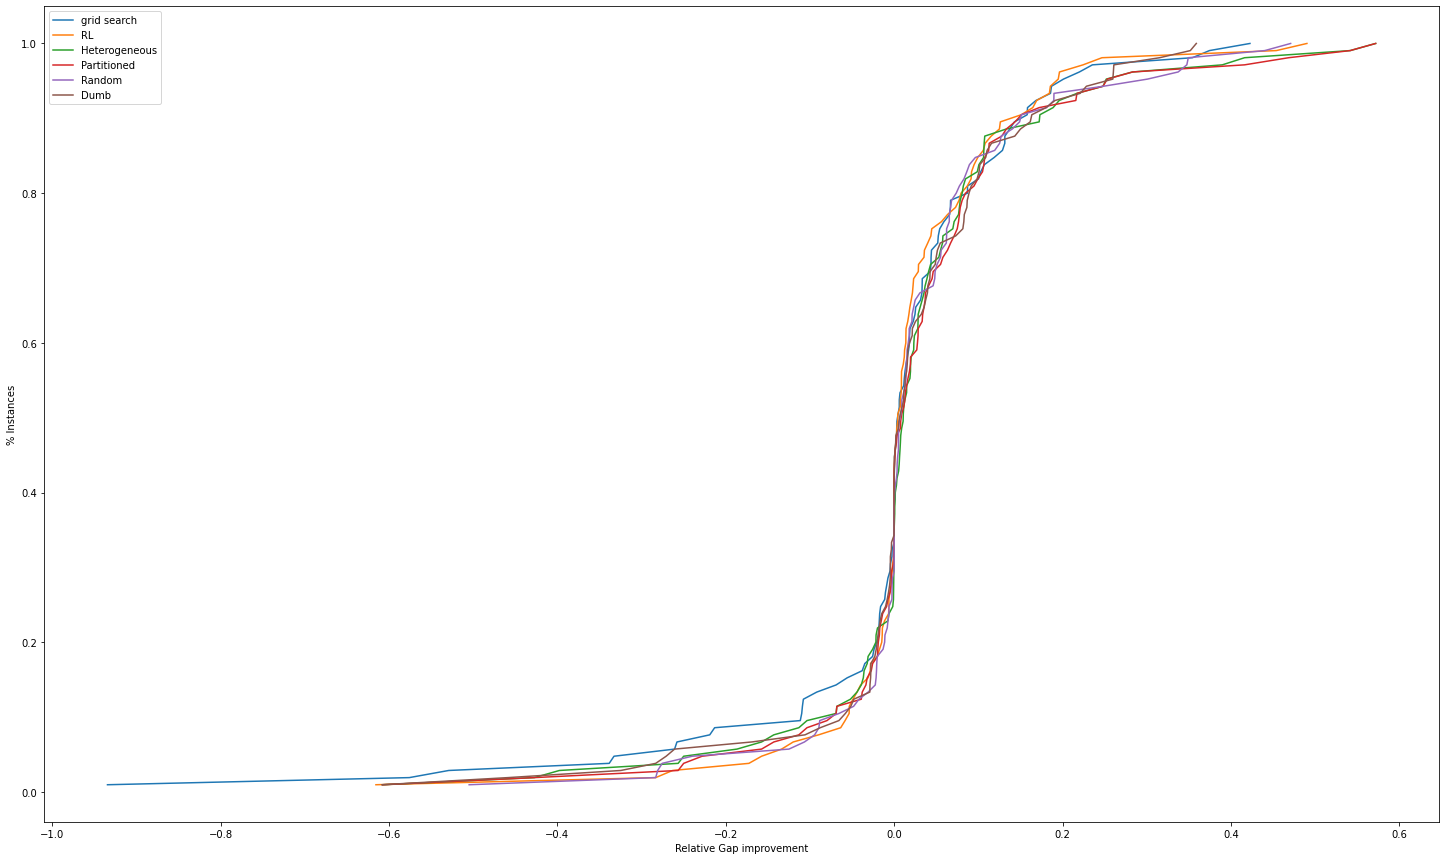

In [ ]:
#stats_df = df_not_optimal.groupby('SOLUTION TIME')['SOLUTION TIME'].agg('count').pipe(pd.DataFrame).rename(columns = {'SOLUTION TIME': 'frequency_default'})
stats_df2 = df_not_optimal.groupby('gap_impr_grid')['gap_impr_grid'].agg('count').pipe(pd.DataFrame).rename(columns = {'gap_impr_grid': 'frequency_grid'})
stats_df3 = df_not_optimal.groupby('gap_impr_rl')['gap_impr_rl'].agg('count').pipe(pd.DataFrame).rename(columns = {'gap_impr_rl': 'frequency_rl'})
stats_df4 = df_not_optimal.groupby('gap_impr_hetero')['gap_impr_hetero'].agg('count').pipe(pd.DataFrame).rename(columns = {'gap_impr_hetero': 'frequency_hetero'})
stats_df5 = df_not_optimal.groupby('gap_impr_partition')['gap_impr_partition'].agg('count').pipe(pd.DataFrame).rename(columns = {'gap_impr_partition': 'frequency_partition'})
stats_df6 = df_not_optimal.groupby('gap_impr_rndm')['gap_impr_rndm'].agg('count').pipe(pd.DataFrame).rename(columns = {'gap_impr_rndm': 'frequency_rndm'})
stats_df7 = df_not_optimal.groupby('gap_impr_dumb')['gap_impr_dumb'].agg('count').pipe(pd.DataFrame).rename(columns = {'gap_impr_dumb': 'frequency_dumb'})


#stats_df['pdf_default'] = stats_df['frequency_default'] / sum(stats_df['frequency_default'])
stats_df2['pdf_grid'] = stats_df2['frequency_grid'] / sum(stats_df2['frequency_grid'])
stats_df3['pdf_rl'] = stats_df3['frequency_rl'] / sum(stats_df3['frequency_rl'])
stats_df4['pdf_hetero'] = stats_df4['frequency_hetero'] / sum(stats_df4['frequency_hetero'])
stats_df5['pdf_partition'] = stats_df5['frequency_partition'] / sum(stats_df5['frequency_partition'])
stats_df6['pdf_rndm'] = stats_df6['frequency_rndm'] / sum(stats_df6['frequency_rndm'])
stats_df7['pdf_dumb'] = stats_df7['frequency_dumb'] / sum(stats_df7['frequency_dumb'])

'''stats_df['cdf_default'] = stats_df['pdf_default'].cumsum()
stats_df = stats_df.reset_index()'''
stats_df2['cdf_grid'] = stats_df2['pdf_grid'].cumsum()
stats_df2 = stats_df2.reset_index()
stats_df3['cdf_rl'] = stats_df3['pdf_rl'].cumsum()
stats_df3 = stats_df3.reset_index()
stats_df4['cdf_hetero'] = stats_df4['pdf_hetero'].cumsum()
stats_df4 = stats_df4.reset_index()

stats_df5['cdf_partition'] = stats_df5['pdf_partition'].cumsum()
stats_df5 = stats_df5.reset_index()


stats_df6['cdf_rndm'] = stats_df6['pdf_rndm'].cumsum()
stats_df6 = stats_df6.reset_index()
stats_df7['cdf_dumb'] = stats_df7['pdf_dumb'].cumsum()
stats_df7 = stats_df7.reset_index()

plt.figure(figsize= (25,15))
#plt.plot(stats_df['SOLUTION TIME'].to_list(), stats_df['cdf_default'].to_list(), label = "default")
plt.plot(stats_df2['gap_impr_grid'].to_list(), stats_df2['cdf_grid'].to_list(), label = "grid search")
plt.plot(stats_df3['gap_impr_rl'].to_list(), stats_df3['cdf_rl'].to_list(), label = "RL")
plt.plot(stats_df4['gap_impr_hetero'].to_list(), stats_df4['cdf_hetero'].to_list(), label = "Heterogeneous")
plt.plot(stats_df5['gap_impr_partition'].to_list(), stats_df5['cdf_partition'].to_list(), label = "Partitioned")
plt.plot(stats_df6['gap_impr_rndm'].to_list(), stats_df6['cdf_rndm'].to_list(), label = "Random")
plt.plot(stats_df7['gap_impr_dumb'].to_list(), stats_df7['cdf_dumb'].to_list(), label = "Dumb")
plt.xlabel('Relative Gap improvement')
plt.ylabel('% Instances')
plt.legend()
plt.show()